# Using clustering algorithms for simple datasets

## Create synthetic dataset

In [1]:
import math
from matplotlib import pyplot as plt
import numpy as np
import random

def get_sin_wave(noise = 5, points = 1000):
    
    sin_wave = []
    c = 0.1
    for i in range(points):
        n = random.random()*noise
        sin_wave.append(abs(50-c*i)+10*math.sin(i*0.5+n)+3*math.sin(i*0.1))
    
    sin_wave = np.array(sin_wave)
    
    sin_wave = sin_wave/max(sin_wave)
    return sin_wave

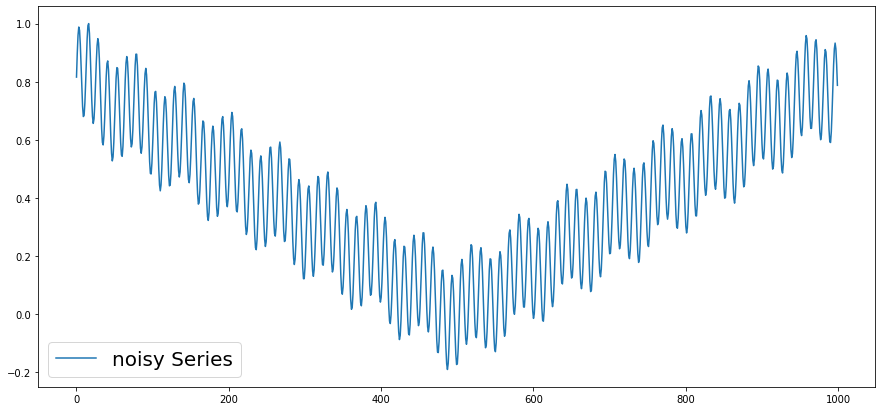

In [2]:
sin_wave = get_sin_wave(noise=0.0)
sin_wave = sin_wave.reshape(-1, 1)

plt.figure(figsize=(15, 7))
plt.plot(sin_wave, label='noisy Series')
plt.legend(fontsize=20)
plt.show()

## Cluster this simple dataset

In [3]:
from sklearn.cluster import KMeans

In [4]:
k = 2
kmeans = KMeans(n_clusters=k, n_init=10)
y_pred = kmeans.fit_predict(sin_wave)
x = [i for i in range(len(y_pred))]

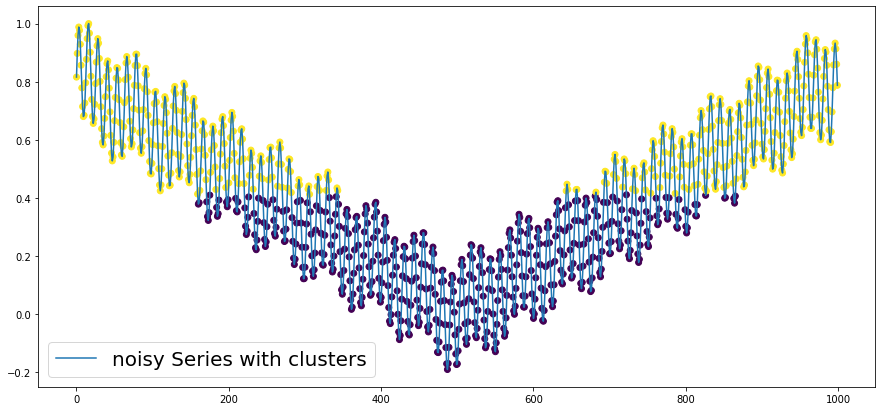

In [5]:
plt.figure(figsize=(15, 7))
plt.plot(sin_wave, label='noisy Series with clusters')
plt.scatter(x, sin_wave, c=y_pred)
plt.legend(fontsize=20)
plt.show()

In [6]:
## See the cluster centers
kmeans.cluster_centers_

array([[0.18831814],
       [0.6333346 ]])

In [7]:
## Transform the points to a soft clustering: Distance from cluster centroid
kmeans.transform(sin_wave[:10])

array([[0.62744497, 0.18242851],
       [0.7089194 , 0.26390294],
       [0.77119414, 0.32617768],
       [0.79975878, 0.35474232],
       [0.78833351, 0.34331705],
       [0.7403955 , 0.29537904],
       [0.66831678, 0.22330032],
       [0.59032482, 0.14530836],
       [0.52603001, 0.08101355],
       [0.49161518, 0.04659872]])

In [8]:
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

## Inertia of K-means

In [9]:
kmeans.inertia_

21.02131463597197

## See the change in inertia and  silhouette_score as K-increases

In [10]:
Inertias = []
Silhouette_score = []
clusters = []
from sklearn.metrics import silhouette_score

for k in range(2, 15):
    clusters.append(k)
    kmeans = KMeans(n_clusters=k, n_init=10)
    y_pred = kmeans.fit_predict(sin_wave)
    
    sc = silhouette_score(sin_wave, kmeans.labels_)
    Silhouette_score.append(sc)
    
    Inertias.append(kmeans.inertia_)

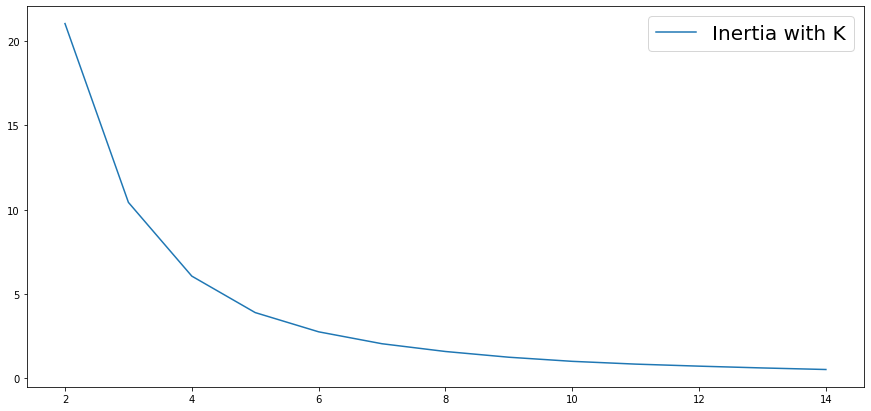

In [11]:
plt.figure(figsize=(15, 7))
plt.plot(clusters, Inertias, label='Inertia with K')
plt.legend(fontsize=20)
plt.show()

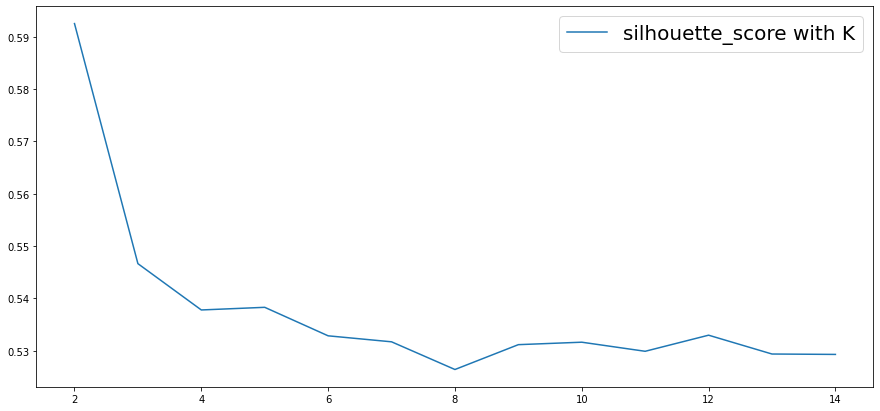

In [12]:
plt.figure(figsize=(15, 7))
plt.plot(clusters, Silhouette_score, label='silhouette_score with K')
plt.legend(fontsize=20)
plt.show()

# Cluster the images

In [13]:
from sklearn.datasets import load_sample_images
dataset = load_sample_images()    

print(len(dataset.images))             

first_img_data = dataset.images[1] 
first_img_data.shape         

2


(427, 640, 3)

In [14]:
#first_img_data

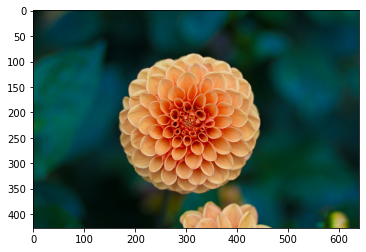

In [15]:
from matplotlib import pyplot as plt
imgplot = plt.imshow(first_img_data)

## Let us do clustering

k is: 3


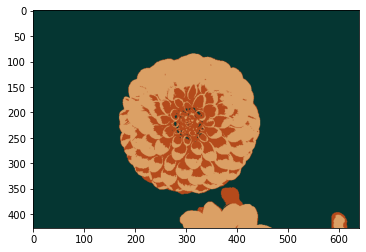

k is: 6


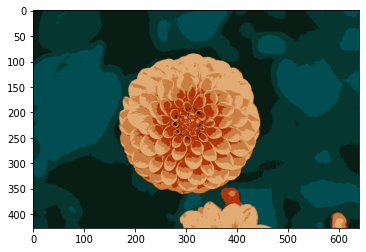

k is: 9


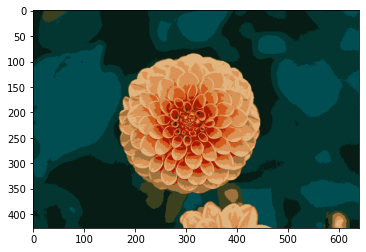

k is: 12


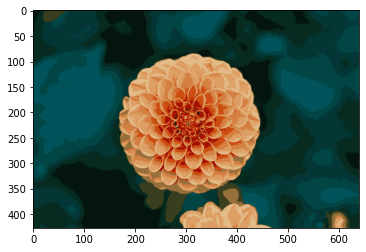

k is: 15


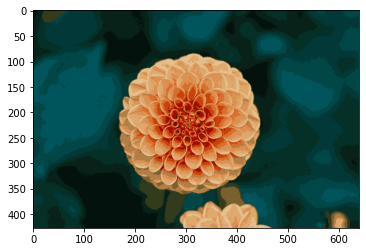

k is: 18


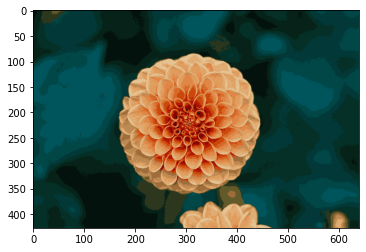

k is: 21


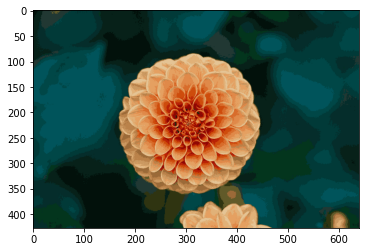

k is: 24


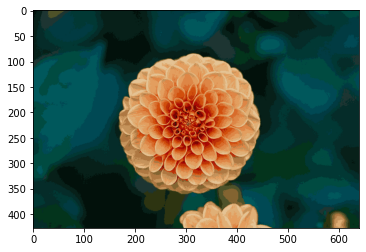

k is: 27


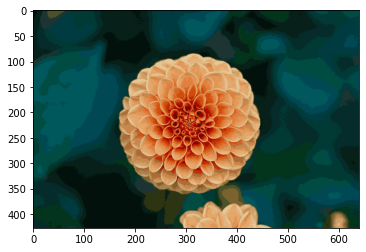

In [16]:
for k in range(3, 30, 3):
    X = first_img_data.reshape(-1, 3)
    kmeans = KMeans(n_clusters=k).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(first_img_data.shape)
    segmented_img = segmented_img.astype(int)
    
    print('k is:', k)
    #print(segmented_img)
    imgplot = plt.imshow(segmented_img)
    plt.show()